In [2]:
!pip3 install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 9.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 1.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 4.1 MB/s eta 0:00:00a 0:00:01


In [12]:
import pandas as pd
import numpy as np
from data_fetcher import DataFetcher
import matplotlib.pyplot as plt

In [2]:
BROAD_DIR = "/home/ubuntu/src/data/cpg0019-moshkov-deepprofiler/broad"

In [3]:

# Add PathIds to each image in the sc metadata
metadata_df = DataFetcher.get_sc_metadata(BROAD_DIR)
metadata_df["PathId"] = metadata_df.apply(
    lambda x: x["Image_Name"].split("/")[-1], axis=1
)
metadata_df.shape

(8423455, 14)

In [4]:
c037_df = metadata_df[metadata_df["Collection"] == "BBBC037"]
print(c037_df.shape)
print(c037_df["Metadata_Plate"].unique())

(256824, 14)
['41744' '41754' '41755' '41756' '41757']


In [ ]:
from typing import List

def prepare_selected_BBBC037_data(metadata, selected_plates: List[str], dataset_name: str):
    c037_selected_df = metadata[(metadata["Collection"] == "BBBC037") & metadata["Metadata_Plate"].isin(selected_plates)]
    


In [5]:
selected_plates = ['41744', '41754', '41755', '41756', '41757']
c037_selected_df = metadata_df[(metadata_df["Collection"] == "BBBC037") & metadata_df["Metadata_Plate"].isin(selected_plates)]
print(c037_selected_df.shape)
c037_selected_df.head()

(256824, 14)


,Collection,Metadata_Plate,Metadata_Well,Metadata_Site,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Image_Name,Treatment,Treatment_Type,Control,Cell_line,LeaveReplicatesOut,LeaveCellsOut,PathId
8166631,BBBC037,41744,a01,1,377,30,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,Training,105@377x30.png
8166632,BBBC037,41744,a01,1,1032,34,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@1032x34.png
8166633,BBBC037,41744,a01,1,986,45,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@986x45.png
8166634,BBBC037,41744,a01,1,799,50,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@799x50.png
8166635,BBBC037,41744,a01,1,483,83,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@483x83.png


In [6]:
print(sorted(c037_selected_df["Treatment"].unique()))
len(sorted(c037_selected_df["Treatment"].unique()))

['AKT1_E17K', 'AKT1_WT', 'ARAF_WT', 'ATF2_WT', 'ATF6_1-373', 'BCL2L11_WT', 'BRAF_V600E', 'BRAF_WT', 'CASP8_WT', 'CCND1_WT', 'CDC42_Q61L', 'CDC42_T17N', 'CDC42_WT', 'CDKN1A_WT', 'CEBPA_WT', 'CSNK1E_WT', 'CTNNB1_WT', 'CXXC4_WT', 'E2F1_WT', 'ELK1_WT', 'EMPTY', 'ERBB2_WT', 'GSK3B_WT', 'HRAS_G12V', 'JUN_WT', 'KRAS_G12V', 'KRAS_WT', 'MAP2K1_WT', 'MAP3K2_WT', 'MAP3K9_WT', 'MAPK1_WT', 'MYD88_WT', 'NOTCH1_ICN1', 'PIK3CA_WT', 'PPARGC1A_WT', 'PRKACA_WT', 'PRKCE_WT', 'PTEN_WT', 'RAC1_Q61L', 'RAF1_L613V', 'RAF1_WT', 'RB1_WT', 'RHOA_Q63L', 'RHOA_WT', 'SMAD4_WT', 'STK11_WT', 'XBP1_WT']


47

In [7]:
print("Only Wildtypes:")
treatment_types_splitted = [t.split('_WT') for t in c037_selected_df["Treatment"].unique()]
wildtypes = [split_list[0] + "_WT" if len(split_list) > 1 else "" for split_list in treatment_types_splitted]
wildtypes = [item for item in wildtypes if item != '']
wildtypes.sort()
print(wildtypes)
print()
perturbations = [split_list[0] if len(split_list) == 1 else "" for split_list in treatment_types_splitted]
perturbations = [item for item in perturbations if item != '']
perturbations.sort()
print("Only perturbations:")
print(perturbations)

Only Wildtypes:
['AKT1_WT', 'ARAF_WT', 'ATF2_WT', 'BCL2L11_WT', 'BRAF_WT', 'CASP8_WT', 'CCND1_WT', 'CDC42_WT', 'CDKN1A_WT', 'CEBPA_WT', 'CSNK1E_WT', 'CTNNB1_WT', 'CXXC4_WT', 'E2F1_WT', 'ELK1_WT', 'ERBB2_WT', 'GSK3B_WT', 'JUN_WT', 'KRAS_WT', 'MAP2K1_WT', 'MAP3K2_WT', 'MAP3K9_WT', 'MAPK1_WT', 'MYD88_WT', 'PIK3CA_WT', 'PPARGC1A_WT', 'PRKACA_WT', 'PRKCE_WT', 'PTEN_WT', 'RAF1_WT', 'RB1_WT', 'RHOA_WT', 'SMAD4_WT', 'STK11_WT', 'XBP1_WT']

Only perturbations:
['AKT1_E17K', 'ATF6_1-373', 'BRAF_V600E', 'CDC42_Q61L', 'CDC42_T17N', 'EMPTY', 'HRAS_G12V', 'KRAS_G12V', 'NOTCH1_ICN1', 'RAC1_Q61L', 'RAF1_L613V', 'RHOA_Q63L']


In [8]:
c037_wildtypes_df = c037_selected_df[c037_selected_df["Treatment"].isin(wildtypes)]
print(c037_wildtypes_df.shape)
print("Top 3 Wildtypes")
print(c037_wildtypes_df["Treatment"].value_counts())
print(f"Total: {sum(c037_wildtypes_df['Treatment'].value_counts())}")
print()
print("Top 5 Perturbations + EMPTY")
c037_perturbations_df = c037_selected_df[c037_selected_df["Treatment"].isin(perturbations)]
print(c037_perturbations_df.shape)
print(c037_perturbations_df["Treatment"].value_counts())
print(f"Total: {sum(c037_perturbations_df['Treatment'].value_counts()) + 1000}")

(110029, 14)
Top 3 Wildtypes
JUN_WT         6673
CEBPA_WT       6572
MAP3K2_WT      5183
PIK3CA_WT      4290
E2F1_WT        4228
ERBB2_WT       3807
PRKACA_WT      3782
BRAF_WT        3706
ATF2_WT        3650
CTNNB1_WT      3624
CSNK1E_WT      3622
RB1_WT         3583
MAP2K1_WT      3548
KRAS_WT        3406
RAF1_WT        3309
PRKCE_WT       3220
STK11_WT       3202
PTEN_WT        3165
CDC42_WT       3158
ARAF_WT        2991
CCND1_WT       2988
MAPK1_WT       2983
GSK3B_WT       2944
AKT1_WT        2570
SMAD4_WT       2533
MAP3K9_WT      2480
ELK1_WT        2189
RHOA_WT        2174
CXXC4_WT       2005
XBP1_WT        1935
PPARGC1A_WT    1890
MYD88_WT       1875
CDKN1A_WT      1462
BCL2L11_WT     1045
CASP8_WT        237
Name: Treatment, dtype: int64
Total: 110029

Top 5 Perturbations + EMPTY
(146795, 14)
EMPTY          120892
AKT1_E17K        3740
RAC1_Q61L        2990
NOTCH1_ICN1      2979
RAF1_L613V       2737
CDC42_T17N       2702
KRAS_G12V        2480
HRAS_G12V        1990
CDC42_Q61

### Extract Top 14 Treatments and prepare metadata

In [11]:
empty_treatment_label = "EMPTY"
top_treatment_labels = ["AKT1_WT", "AKT1_E17K", 
                        "BRAF_WT", "BRAF_V600E", 
                        "CDC42_WT", "CDC42_Q61L", "CDC42_T17N", 
                        "KRAS_WT", "KRAS_G12V", 
                        "RAF1_WT", "RAF1_L613V", 
                        "RHOA_WT", "RHOA_Q63L"
                        ]
class_labels = top_treatment_labels.copy()
class_labels.append(empty_treatment_label)
class_labels

['AKT1_WT',
 'AKT1_E17K',
 'BRAF_WT',
 'BRAF_V600E',
 'CDC42_WT',
 'CDC42_Q61L',
 'CDC42_T17N',
 'KRAS_WT',
 'KRAS_G12V',
 'RAF1_WT',
 'RAF1_L613V',
 'RHOA_WT',
 'RHOA_Q63L',
 'EMPTY']

(35430, 14)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

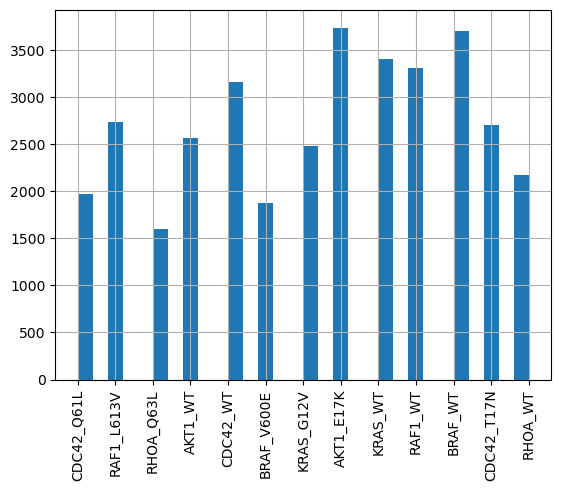

In [15]:
# Check the dataset before sampling
c037_selected_labels_df = c037_selected_df[c037_selected_df["Treatment"].isin(top_treatment_labels)]
print(c037_selected_labels_df.shape)

ax = c037_selected_labels_df["Treatment"].hist(bins=30)
plt.xticks(rotation = "vertical")

#### Sample 1k from EMPTY

In [16]:
sample_size = 2000
empty_treatments_sampled_df = c037_selected_df[c037_selected_df["Treatment"] == empty_treatment_label].sample(n=sample_size, random_state=42)

#### Sample 1k images from each label

In [19]:
sample_size = 2000
c037_27k_dataset = empty_treatments_sampled_df.copy()
print(f"Before sampling, total dataset: {c037_selected_labels_df.shape}")

for label in class_labels:
    if label == empty_treatment_label:
        # Do not re-add empty
        continue
    
    label_df = c037_selected_df[c037_selected_df["Treatment"] == label]

    if label_df.shape[0] < sample_size:
        # Do not upsample just append it as is.
        c037_27k_dataset = pd.concat([c037_27k_dataset, label_df])
        continue

    sampled_label_df = label_df.sample(n=sample_size, random_state=42)
    c037_27k_dataset = pd.concat([c037_27k_dataset, sampled_label_df])

print(f"After sampling, total dataset: {c037_27k_dataset.shape}")
c037_27k_dataset.head()

Before sampling, total dataset: (35430, 14)
After sampling, total dataset: (27448, 14)


,Collection,Metadata_Plate,Metadata_Well,Metadata_Site,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Image_Name,Treatment,Treatment_Type,Control,Cell_line,LeaveReplicatesOut,LeaveCellsOut,PathId
8255825,BBBC037,41754,l09,2,776,538,../../training_images/BBBC037/41754/l09/2/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@776x538.png
8314697,BBBC037,41755,m16,2,522,724,../../training_images/BBBC037/41755/m16/2/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@522x724.png
8321958,BBBC037,41755,p23,5,953,186,../../training_images/BBBC037/41755/p23/5/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@953x186.png
8264069,BBBC037,41754,o21,3,525,56,../../training_images/BBBC037/41754/o21/3/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@525x56.png
8360445,BBBC037,41756,k08,8,995,81,../../training_images/BBBC037/41756/k08/8/105@...,EMPTY,ORF,Control,U2OS,NotUsed,NotUsed,105@995x81.png


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

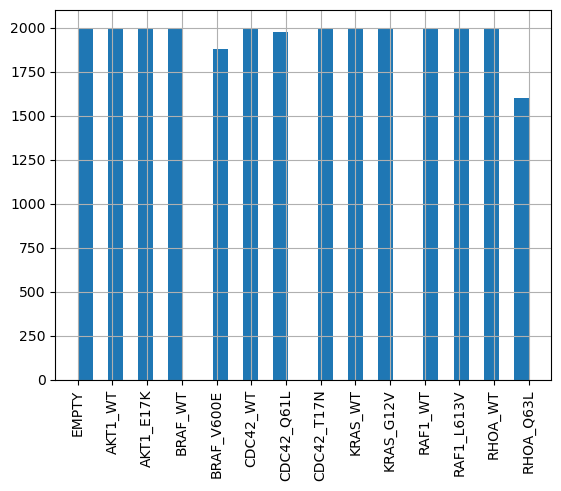

In [20]:
import matplotlib.pyplot as plt
ax = c037_27k_dataset["Treatment"].hist(bins=30)
plt.xticks(rotation = "vertical")

In [21]:
c037_27k_dataset.to_parquet("/home/ubuntu/src/c037_27k_metadata.parquet", engine="pyarrow")

In [22]:
c037_27k_dataset["Treatment"].value_counts()

EMPTY         2000
AKT1_WT       2000
AKT1_E17K     2000
BRAF_WT       2000
CDC42_WT      2000
CDC42_T17N    2000
KRAS_WT       2000
KRAS_G12V     2000
RAF1_WT       2000
RAF1_L613V    2000
RHOA_WT       2000
CDC42_Q61L    1973
BRAF_V600E    1878
RHOA_Q63L     1597
Name: Treatment, dtype: int64